In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

(100, 2)
(100,)


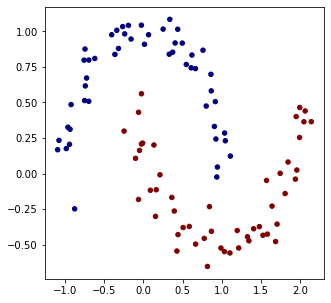

In [203]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

#make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = y*2 - 1 # make y be -1 or 1

print(X.shape)

print(y.shape)



plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')



In [223]:

# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

for p in model.parameters():
    p.grad = 0.0



MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [205]:
ypred = [model(x) for x in X]

In [157]:
print(ypred[0:8])

[Value(data=2.1884321968570974, grad=0), Value(data=0.4506849681803984, grad=0), Value(data=2.029988241103149, grad=0), Value(data=-0.05694054195500058, grad=0), Value(data=1.1608247419366617, grad=0), Value(data=1.910926999789522, grad=0), Value(data=0.8267092473417806, grad=0), Value(data=1.9982173475088758, grad=0)]


In [158]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(y, ypred))

print(loss)
loss.backward()

print(model.layers[0].neurons[0].w[0])

for p in model.parameters():
    p.data += -0.01 * p.grad
    
print(model.layers[0].neurons[0].w[0].data)



Value(data=362.4950891905646, grad=0)
Value(data=0.23550571390294128, grad=-197.27045744536315)
2.2082102883565726


In [224]:
for e in range(1):
    print("epoch:" , e)

    for k in range(100):
        ypred = [model(x) for x in X]
        loss = sum((yout - ygt)**2 for ygt, yout in zip(y, ypred))


        for p in model.parameters():
            p.grad = 0.0

        loss.backward()

        for p in model.parameters():
            p.data += -0.001 *p.grad

        print(k, loss.data)

epoch: 0
0 334.161687256494
1 165.36371767365023
2 63.17845980491002
3 48.86795177434896
4 44.59457130866092
5 41.39463319411645
6 39.18167810809849
7 37.42790788441841
8 35.82057403605275
9 34.48612730635494
10 33.421687775063035
11 32.54899900758056
12 31.698948768139118
13 30.976417254822245
14 30.354249002108254
15 29.813882624071002
16 29.333566086230583
17 28.903399217467832
18 28.50222749403245
19 28.08546711147261
20 27.670776828116114
21 27.309583063954328
22 26.98272183585559
23 26.69321803307117
24 26.43334188816099
25 26.197532164883487
26 25.96480360154114
27 25.73755310519744
28 25.516465585971986
29 25.302761531835436
30 25.096144670193844
31 24.894090422505393
32 24.69312706211244
33 24.48902427483907
34 24.284914936384002
35 24.078499379931213
36 23.8737171646497
37 23.66093529778619
38 23.443553491283645
39 23.179309909667946
40 22.914513163182814
41 22.693509582498876
42 22.486409635689455
43 22.285670300117694
44 22.09318559491438
45 21.90284124859177
46 21.71336699

[[False False False False False False False False False False  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False False False  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False False  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True
  False  

(-1.652316654122941, 1.847683345877059)

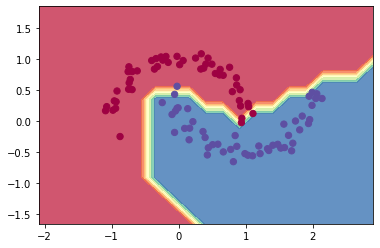

In [226]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

print(Z)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [218]:
print(loss)

Value(data=13.230973846623266, grad=1)


In [219]:
print(ypred[1])
print(y[1])



Value(data=0.7949729209844941, grad=-0.41005415803101175)
1
